## **IMPORTS AND LIBRARIES**
The following lines of code contains the uploaded csv file of the dataset and importation of libraries that would be used throughout the process.

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving carbonmonitor-global_datas_2024-08-21.csv to carbonmonitor-global_datas_2024-08-21 (1).csv


In [ ]:
# import operational libraries
import pandas as pd
import numpy as np

# import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# import data processing libraries
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from statsmodels.tsa.seasonal import seasonal_decompose

# import data splitting libraries
from sklearn.model_selection import train_test_split

# import machine learning libraries
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, SimpleRNN, Dense, Embedding, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

# import model evaluation libraries
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, r2_score
from scipy import stats




# **DATA PREPROCESSING**
The following lines of code contains the preprocessing and data cleaning taken on the dataset.
They include code for checking for missing data, visualization, getting a description of the dataset(rows and columns) and dimensions of the dataset

In [ ]:
dataset = pd.read_csv('carbonmonitor-global_datas_2024-08-21.csv')
dataset.head(11)

,country,date,sector,value,timestamp
0,Brazil,01/01/2019,Domestic Aviation,0.023750,1546300800
1,Brazil,01/01/2019,Ground Transport,0.201663,1546300800
2,Brazil,01/01/2019,Industry,0.240156,1546300800
3,Brazil,01/01/2019,International Aviation,0.018398,1546300800
4,Brazil,01/01/2019,Power,0.107727,1546300800
5,Brazil,01/01/2019,Residential,0.098452,1546300800
6,China,01/01/2019,Domestic Aviation,0.163042,1546300800
7,China,01/01/2019,Ground Transport,2.521740,1546300800
8,China,01/01/2019,Industry,10.417400,1546300800
9,China,01/01/2019,International Aviation,0.076897,1546300800


In [ ]:
dataset.describe()

,value,timestamp
count,168672.000000,1.686720e+05
mean,2.358710,1.633003e+09
std,5.904847,5.008274e+07
min,0.000078,1.546301e+09
25%,0.078701,1.589652e+09
50%,0.314519,1.633003e+09
75%,1.626863,1.676354e+09
max,45.087300,1.719706e+09


In [ ]:
dataset.shape

(168672, 5)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168672 entries, 0 to 168671
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   country    168672 non-null  object 
 1   date       168672 non-null  object 
 2   sector     168672 non-null  object 
 3   value      168672 non-null  float64
 4   timestamp  168672 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 6.4+ MB


In [ ]:
dataset.isna().sum()

,0
country,0
date,0
sector,0
value,0
timestamp,0


In [ ]:
# To perform tasks on certain columns of string type, they have to be encoded to numerical datatype using the Label Encoder
# Since the columns to be encoded are more than one, they would be stored in a variable which would then be used

string = ['country', 'sector']
le = LabelEncoder()
dataset[string] = dataset[string].apply(le.fit_transform)
dataset.tail(15)

,country,date,sector,value,timestamp
168657,11,30/06/2024,3,0.119204,1719705600
168658,11,30/06/2024,4,0.071350,1719705600
168659,11,30/06/2024,5,0.171107,1719705600
168660,12,30/06/2024,0,0.445340,1719705600
168661,12,30/06/2024,1,3.560030,1719705600
168662,12,30/06/2024,2,3.137780,1719705600
168663,12,30/06/2024,3,0.255343,1719705600
168664,12,30/06/2024,4,5.295630,1719705600
168665,12,30/06/2024,5,0.916779,1719705600
168666,13,30/06/2024,0,0.982769,1719705600


In [ ]:

string = ['country', 'sector']

# Initialize the LabelEncoder
le_country = LabelEncoder()
le_sector = LabelEncoder()

# Fit and transform the 'country' column
dataset['country_encoded'] = le_country.fit_transform(dataset['country'])

# Fit and transform the 'sector' column
dataset['sector_encoded'] = le_sector.fit_transform(dataset['sector'])

# Retrieve the mappings for each column
country_mapping = dict(zip(le_country.classes_, le_country.transform(le_country.classes_)))
sector_mapping = dict(zip(le_sector.classes_, le_sector.transform(le_sector.classes_)))

print("Original values and their corresponding encoded values for 'country':")
print(country_mapping)

Original values and their corresponding encoded values for 'country':
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13}


# **DATA VISUALISATION**
The template for the following codes were gotten from Libraries(seaborn link = 'https://seaborn.pydata.org/tutorial/introduction.html', matplotlib link = 'https://matplotlib.org/') and then modified to suit this dataset

<ipython-input-126-0cb9cb5bfd5d>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  cp1.set_xticklabels(cp1.get_xticklabels(), rotation=90)
<ipython-input-126-0cb9cb5bfd5d>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  cp1.set_xticklabels(cp1.get_xticklabels(), rotation=90)


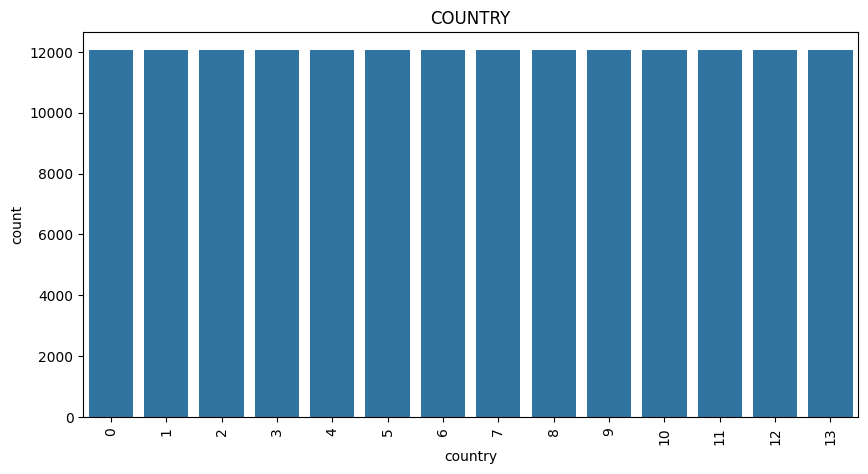

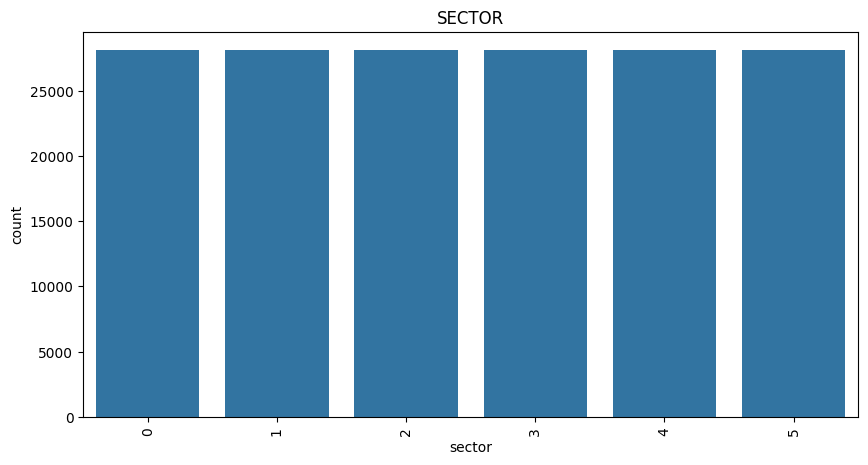

In [ ]:
# To get a better view of the dataset for analysis, countplot is used to see if there is need for further preprocessing
def show_countplot(dataframe, column_list):
    for column in column_list:
        column_name = column.replace("_", " ").upper() # create a name for the current column
        plt.figure(figsize=(10,5))
        cp1 = sns.countplot(x=dataframe[column])
        cp1.set_xticklabels(cp1.get_xticklabels(), rotation=90)
        cp1.set_title(column_name)
show_countplot(dataset, ["country", "sector"])

In [ ]:
# Removing records where countries is 'WORL'D' and sector is 'TOTAL' to prevent inconsistencies during analysis
dataset = dataset.loc[((dataset['country'] != 'WORLD') | ((dataset['sector'] == 'International Aviation') & (dataset['country'] == 'WORLD')))]
dataset.nunique()

,0
country,14
sector,6
value,157267
country_encoded,14
sector_encoded,6
date_time,2008


In [ ]:
# The timestamp column is dropped because it is not useful in this analysis and may cause inconsistencies if left as is
dataset = dataset.drop(dataset.columns[[4]], axis=1)
dataset.head()

,country,date,sector,value,country_encoded,sector_encoded
0,0,01/01/2019,0,0.023750,0,0
1,0,01/01/2019,1,0.201663,0,1
2,0,01/01/2019,2,0.240156,0,2
3,0,01/01/2019,3,0.018398,0,3
4,0,01/01/2019,4,0.107727,0,4


In [ ]:
from datetime import datetime

# This strips the date column in the dataset into date components
def parse_daily_data_as_datetime(date):
    return datetime.strptime(str(date), "%d/%m/%Y")

# The date column is converted to a date_time object
dataset["date_time"] = dataset["date"].apply(parse_daily_data_as_datetime)

# index the dataframe with the newly created date_time column
dataset.index = dataset["date_time"]

dataset.head()

,country,date,sector,value,country_encoded,sector_encoded,date_time
date_time,,,,,,,
2019-01-01,0,01/01/2019,0,0.023750,0,0,2019-01-01
2019-01-01,0,01/01/2019,1,0.201663,0,1,2019-01-01
2019-01-01,0,01/01/2019,2,0.240156,0,2,2019-01-01
2019-01-01,0,01/01/2019,3,0.018398,0,3,2019-01-01
2019-01-01,0,01/01/2019,4,0.107727,0,4,2019-01-01


In [ ]:
scaler = MinMaxScaler()
dataset[['value']] = scaler.fit_transform(dataset[['value']])
dataset.head()

,country,date,sector,value,country_encoded,sector_encoded,date_time
date_time,,,,,,,
2019-01-01,0,01/01/2019,0,0.000525,0,0,2019-01-01
2019-01-01,0,01/01/2019,1,0.004471,0,1,2019-01-01
2019-01-01,0,01/01/2019,2,0.005325,0,2,2019-01-01
2019-01-01,0,01/01/2019,3,0.000406,0,3,2019-01-01
2019-01-01,0,01/01/2019,4,0.002388,0,4,2019-01-01


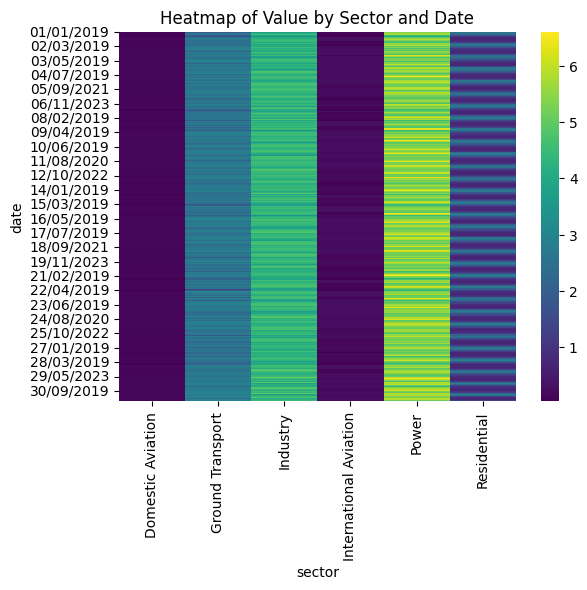

In [ ]:
sns.heatmap(dataset.pivot_table(index='date', columns='sector', values='value'), cmap='viridis')
plt.title('Heatmap of Value by Sector and Date')
plt.show()


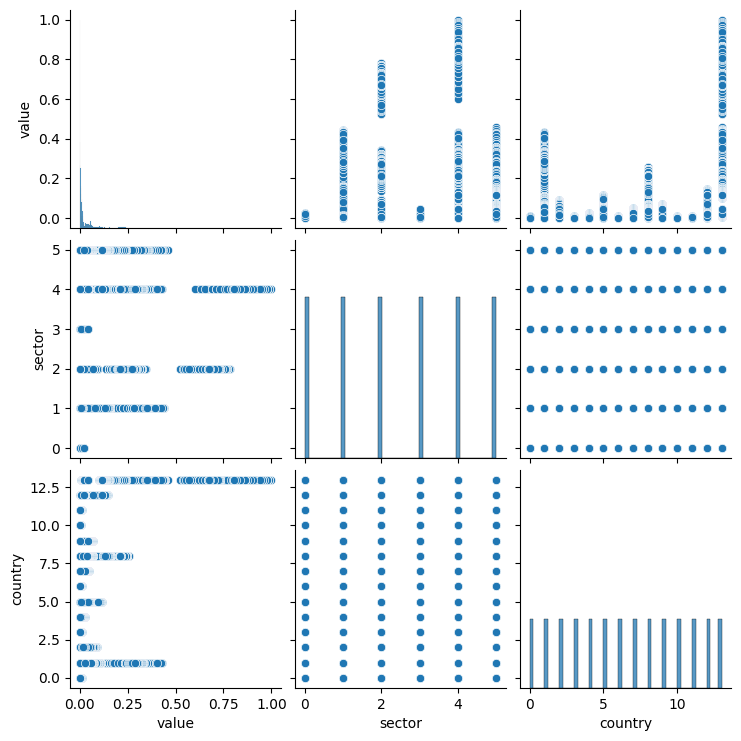

In [ ]:
sns.pairplot(dataset[['value', 'sector', 'country']])
plt.show()

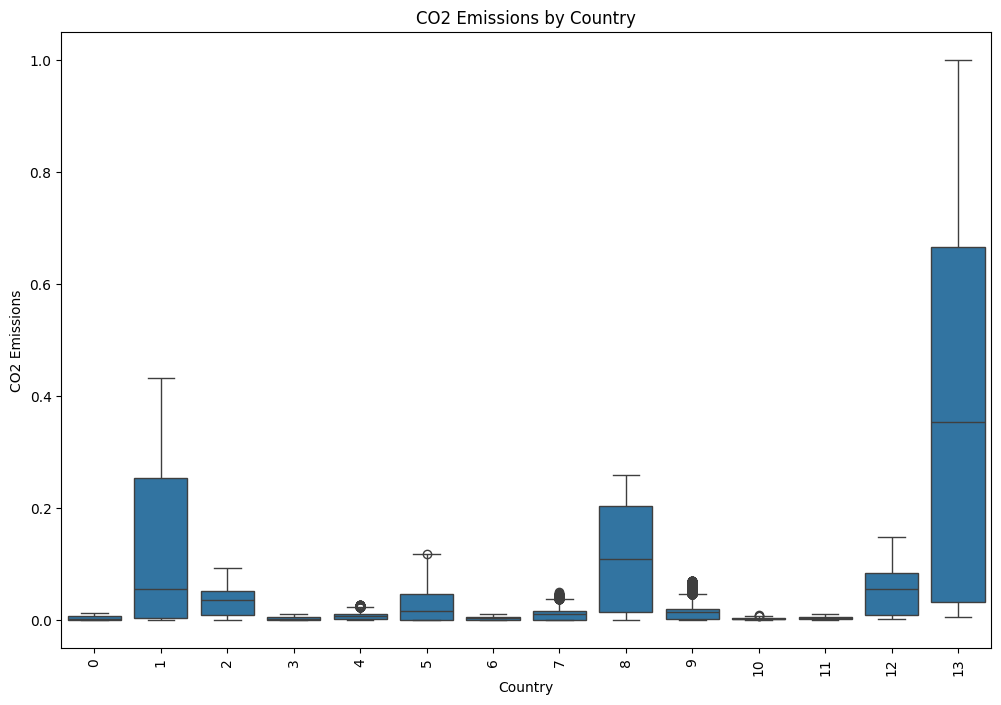

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='country', y='value', data=dataset)
plt.xlabel('Country')
plt.ylabel('CO2 Emissions')
plt.title('CO2 Emissions by Country')
plt.xticks(rotation=90)
plt.show()


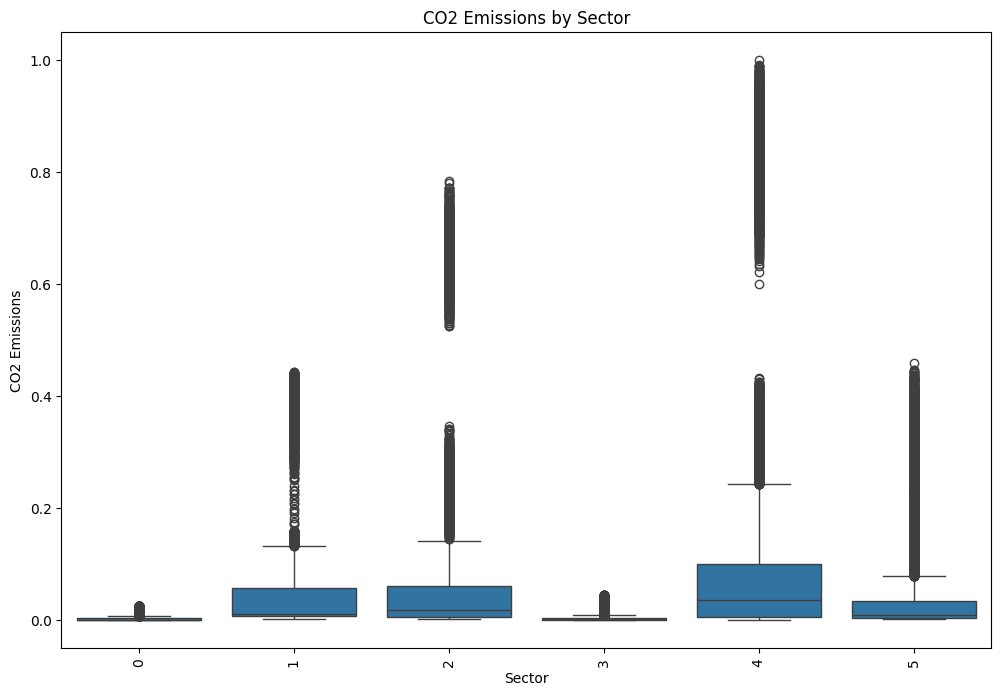

In [ ]:

# Ensure 'value' column is numeric
dataset['value'] = pd.to_numeric(dataset['value'], errors='coerce')

# Box Plot: CO2 Emissions by Sector
plt.figure(figsize=(12, 8))
sns.boxplot(x='sector', y='value', data=dataset)
plt.title('CO2 Emissions by Sector')
plt.xlabel('Sector')
plt.ylabel('CO2 Emissions')
plt.xticks(rotation=90)
plt.show()


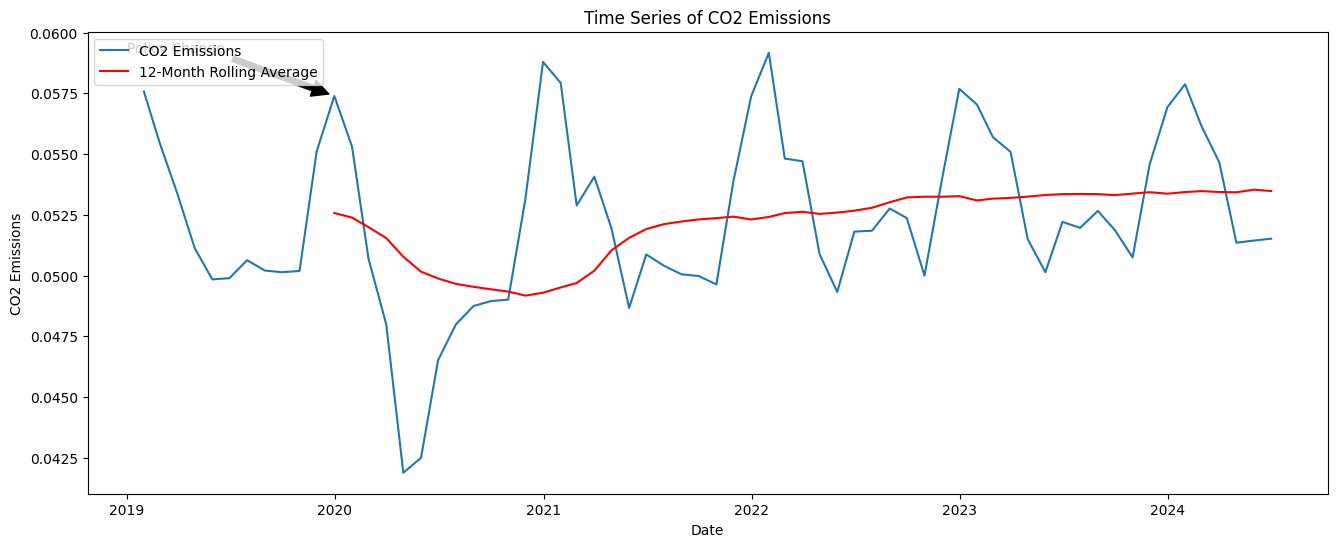

In [ ]:
# plt.figure(figsize=(10, 6))
# plt.plot(dataset['date'], dataset['value'], label='CO2 Emissions')
# plt.xlabel('Date')
# plt.ylabel('CO2 Emissions')
# plt.title('Time Series of CO2 Emissions')
# plt.legend()
# plt.show()

# Check if 'date' is already the index, if not, convert and set as index
if 'date' in dataset.columns:
    # Convert the 'date' column to datetime objects if it's not already
    dataset['date'] = pd.to_datetime(dataset['date'], format='%d/%m/%Y')

    # Set the 'date' column as the index
    dataset = dataset.set_index('date')

# Resample the data to monthly averages
dataset_resampled = dataset.resample('M').mean()

# Time Series: CO2 Emissions Over Time
# ... (rest of the code remains the same)

# Time Series: CO2 Emissions Over Time
plt.figure(figsize=(16, 6))
plt.plot(dataset_resampled.index, dataset_resampled['value'], label='CO2 Emissions')
plt.plot(dataset_resampled.index, dataset_resampled['value'].rolling(window=12).mean(), label='12-Month Rolling Average', color='red')
plt.title('Time Series of CO2 Emissions')
plt.xlabel('Date')
plt.ylabel('CO2 Emissions')
plt.legend()

# Add annotations for significant events (example) # Comment is now unindented.
# Find the closest date to '2020-01-01' in your resampled index
closest_date = dataset_resampled.index.get_indexer(['2020-01-01'], method='nearest')[0]
annotation_date = dataset_resampled.index[closest_date]

# Convert the annotation's x-coordinate to a datetime object
annotation_x = pd.to_datetime('2019-01-01')

plt.annotate('Policy Change',
             xy=(annotation_date, dataset_resampled.loc[annotation_date]['value']),
             xytext=(annotation_x, dataset_resampled['value'].max()), # Use the datetime object here
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

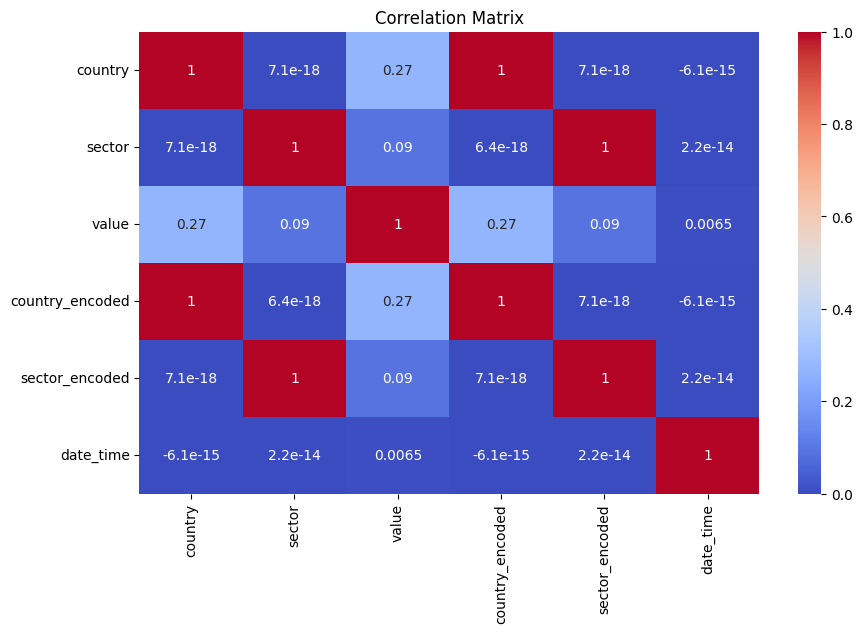

In [ ]:
plt.figure(figsize=(10, 6))
corr_matrix = dataset.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# **RANDOM FOREST MODEL**
This section contains the training, splitting and evaluation of the Random Forest model. The templae for most of the code was gotten from previous classes, libraries(matplotlib) and then suggestions from GEMININ AI.

In [ ]:
# Use 'country' as the independent variable
X = pd.get_dummies(dataset['country'])
y = dataset['value']

In [ ]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R² Score: {r2}')


Mean Squared Error: 0.008727417923134743
Mean Absolute Error: 0.04177244699666469
Root Mean Squared Error: 0.09342065041057433
R² Score: 0.47945707617284816


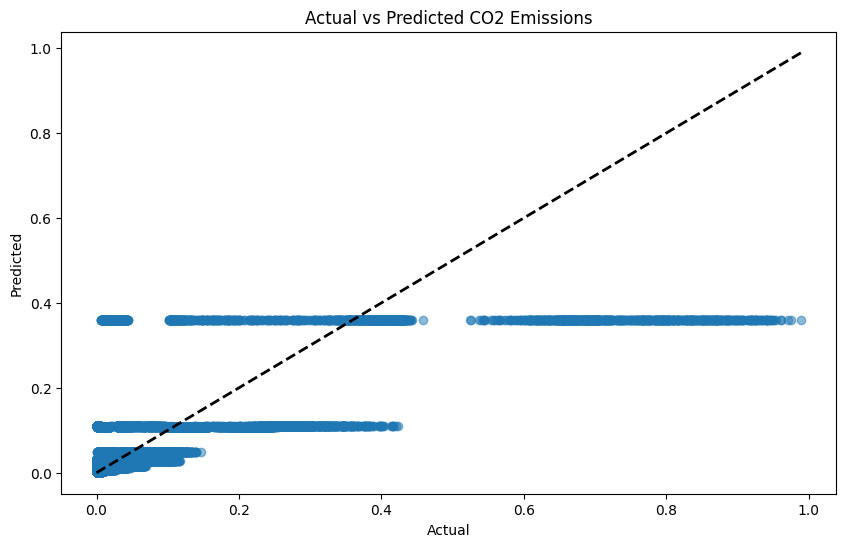

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted CO2 Emissions')
plt.show()


#  **LSTM NETWORK**
This section contains the codes to train, reshape, build, compile and evaluate the model. The template was gotten from Machine Learning Mastery (link = 'https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/')and then fine tuned to suit this dataset. Suggestions were made by Gemini AI on google colab to fix errors

In [ ]:
# Select the independent variable (choose either 'country' or 'sector')
X = dataset[['country']]  # or df[['sector']]
y = dataset['value']

# Normalize the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

# Reshape input to be 3D [samples, timesteps, features]
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split the data into training and testing sets
train_size = int(len(X_scaled) * 0.8)
test_size = len(X_scaled) - train_size
X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
y_train, y_test = y_scaled[:train_size], y_scaled[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(1, X_scaled.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Print the loss and MAE for each epoch
for epoch, (loss, mae) in enumerate(zip(history.history['loss'], history.history['mean_absolute_error'])):
    print(f"Epoch {epoch + 1}: Loss = {loss}, MAE = {mae}")

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test MAE: {mae}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
4217/4217 ━━━━━━━━━━━━━━━━━━━━ 28s 6ms/step - loss: 0.0150 - mean_absolute_error: 0.0663 - val_loss: 0.0129 - val_mean_absolute_error: 0.0517
Epoch 2/50
4217/4217 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - loss: 0.0108 - mean_absolute_error: 0.0541 - val_loss: 0.0127 - val_mean_absolute_error: 0.0513
Epoch 3/50
4217/4217 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - loss: 0.0104 - mean_absolute_error: 0.0519 - val_loss: 0.0109 - val_mean_absolute_error: 0.0512
Epoch 4/50
4217/4217 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - loss: 0.0103 - mean_absolute_error: 0.0520 - val_loss: 0.0108 - val_mean_absolute_error: 0.0511
Epoch 5/50
4217/4217 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - loss: 0.0106 - mean_absolute_error: 0.0522 - val_loss: 0.0105 - val_mean_absolute_error: 0.0510
Epoch 6/50
4217/4217 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - loss: 0.0102 - mean_absolute_error: 0.0516 - val_loss: 0.0105 - val_mean_absolute_error: 0.0528
Epoch 7/50
4217/4217 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - loss: 0.0104 - mean_absol